In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/content/Rainfall.csv')

In [3]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [5]:
df.shape

(366, 12)

In [6]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [8]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [9]:
df.columns = df.columns.str.strip()
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})
correalation = df[['temparature','humidity','windspeed','cloud','rainfall']].corr()
display(correalation['rainfall'].sort_values(ascending=False))

,rainfall
rainfall,1.000000
cloud,0.625766
humidity,0.489623
windspeed,0.154488
temparature,-0.037360


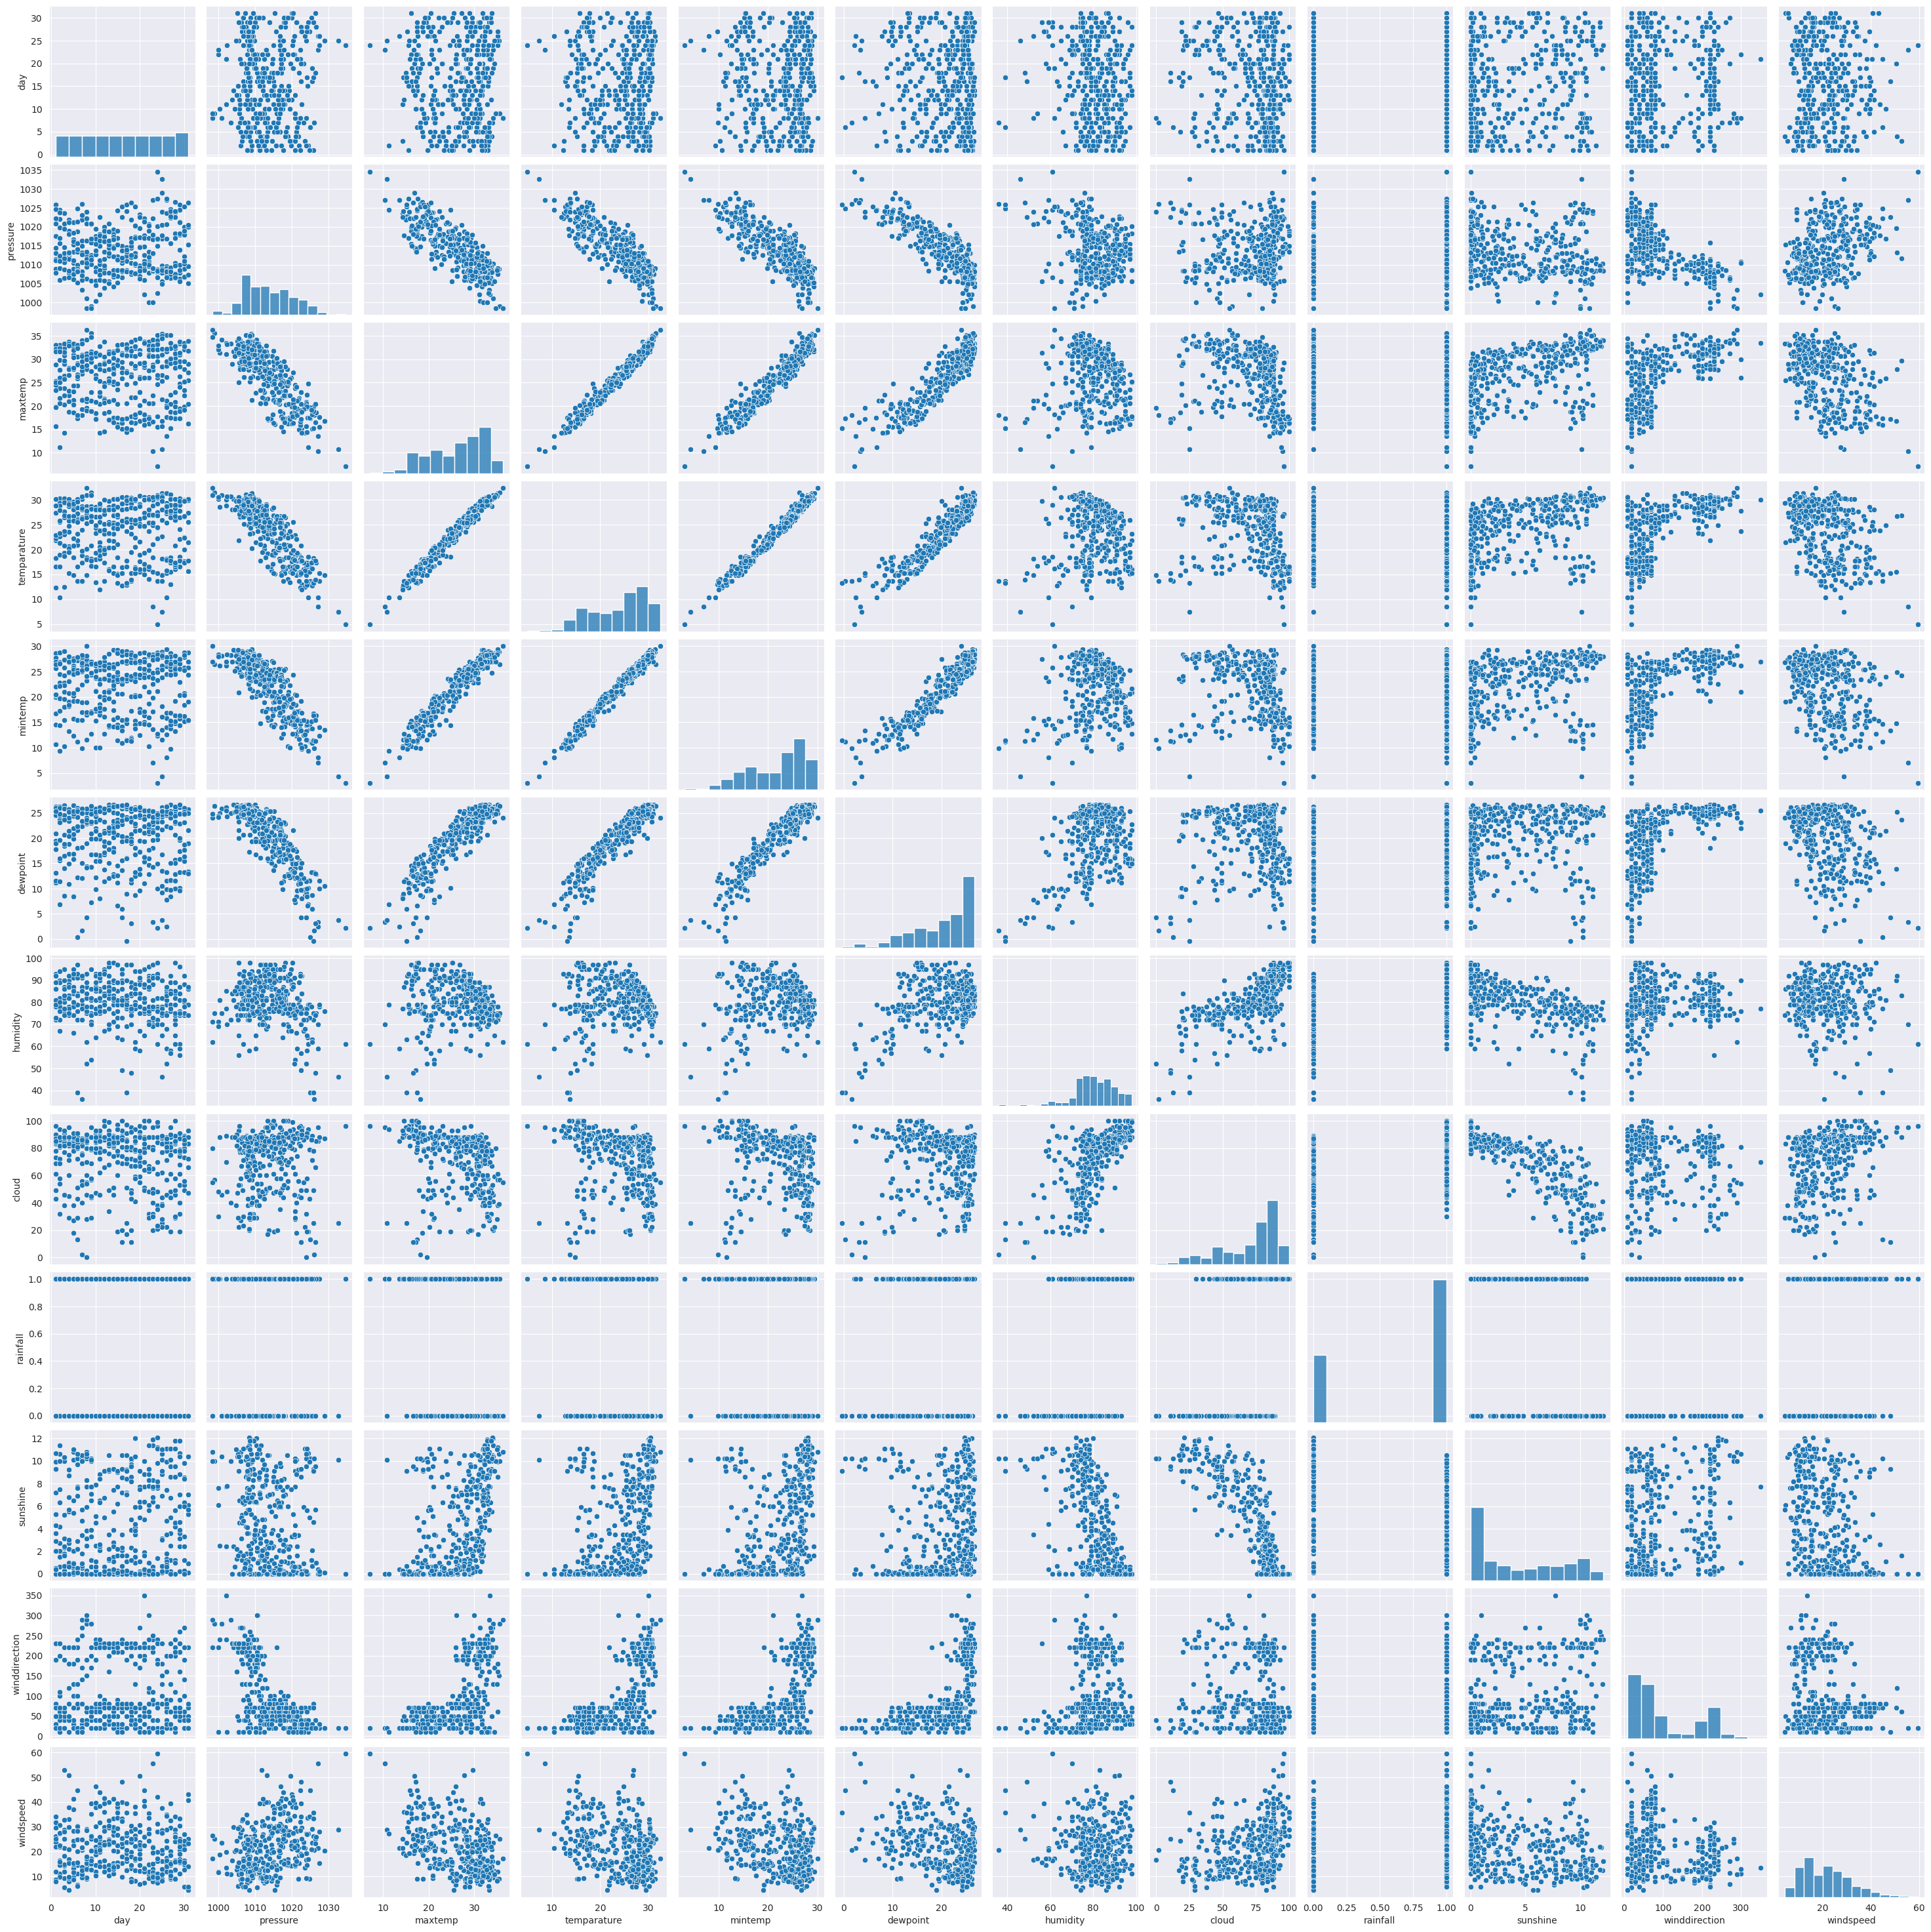

In [10]:
sns.set_style('darkgrid')
sns.pairplot(df)

In [ ]:
plt.subplot(3,3,1)
city_rainfall=df.groupby('city')['rainfall'].mean().sort_values(ascending=False)
sns.barplot(x=city_rainfall.index, y=city_rainfall)
plt.xticks(rotation='vertical')
city_rainfall.plot(kind='bar')
plt.title('city wise rainfall')
plt.xlabel('city')
plt.ylabel('rainfall')

In [13]:
display(df.columns)

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [14]:
x=df[['temparature','humidity','windspeed','cloud']]
y=df['rainfall']
#x is independent , y is dependent

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#test size show how much percent data will be used for training and how much will be used for testing


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 4)
(74, 4)
(292,)
(74,)


In [20]:
model=LinearRegression()
# Identify rows with NaN values in X_train
nan_rows_train = X_train.isnull().any(axis=1)

# Drop rows with NaN values from X_train and corresponding y_train
X_train_cleaned = X_train[~nan_rows_train]
y_train_cleaned = y_train[~nan_rows_train]

model.fit(X_train_cleaned, y_train_cleaned)

LinearRegression()

In [21]:
y_pred=model.predict(X_test)

In [24]:
result=pd.DataFrame({'Actual_Rainfall(mm)':y_test.values,'Predicted_Rainfall(mm)':y_pred,'Difference(mm)':y_test.values-y_pred})
print(result)

    Actual_Rainfall(mm)  Predicted_Rainfall(mm)  Difference(mm)
0                     1                0.955017        0.044983
1                     1                0.811911        0.188089
2                     1                0.974314        0.025686
3                     1                0.852442        0.147558
4                     1                0.708851        0.291149
..                  ...                     ...             ...
69                    1                1.003094       -0.003094
70                    1                0.864077        0.135923
71                    1                0.981268        0.018732
72                    1                0.832218        0.167782
73                    1                0.426691        0.573309

[74 rows x 3 columns]


In [25]:
mse= mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [30]:
new=pd.DataFrame({
    'temparature':[35],
    'humidity': [26],
    'windspeed':[10],
    'cloud':[10]
    })
display(new)

,temparature,humidity,windspeed,cloud
0,35,26,10,10


In [31]:
newrecord= model.predict(new)
print(newrecord)

[-0.16981695]


In [33]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict using the test data
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Optional: Calculate MSE too
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R² Score: 0.2405845407116024
Mean Squared Error: 0.16267244955173307


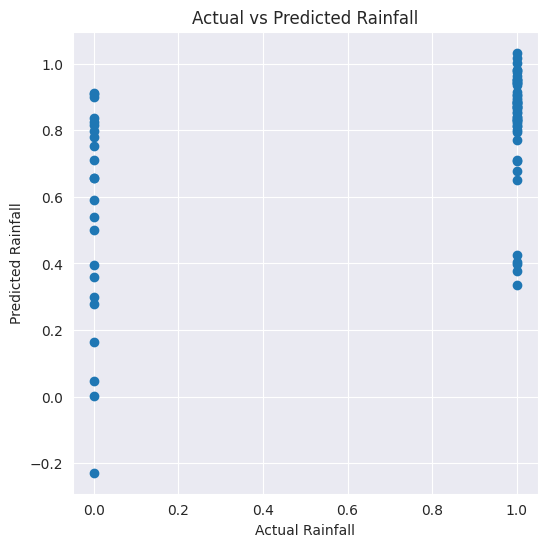

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs Predicted Rainfall")
plt.show()


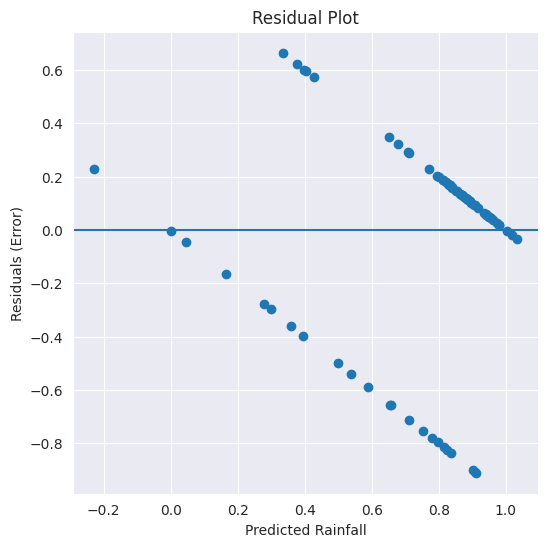

In [35]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Rainfall")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()


# New section